## Import Libraries

In [20]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random
from time import sleep
from IPython.display import clear_output

## Import Custom Libraries

In [2]:
from map import CustomGraph
from agent import Agent

## Create a Graph

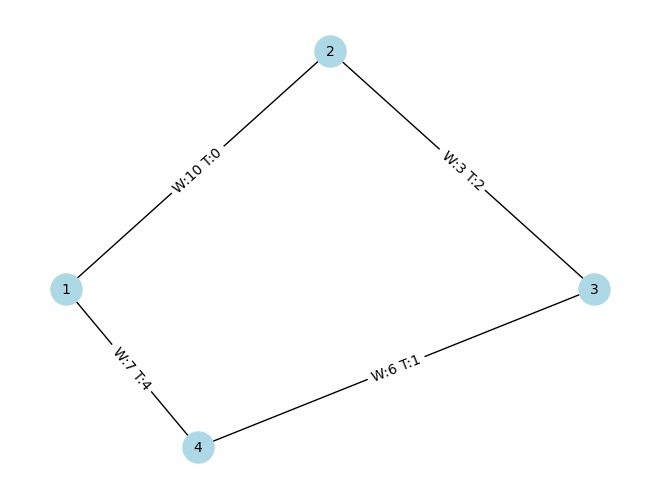

In [3]:
# Example usage
graph = CustomGraph()

# Adding nodes with x, y coordinates
graph.add_node(1, 0, 0)
graph.add_node(2, 2, 3)
graph.add_node(3, 4, 0)
graph.add_node(4, 1, -2)

# Adding edges with weight and targets
graph.add_edge(1, 2, weight=5, targets=3)
graph.add_edge(2, 3, weight=3, targets=2)
graph.add_edge(1, 4, weight=7, targets=4)
graph.add_edge(3, 4, weight=6, targets=1)  # Should avoid overlap

# Updating an edge
graph.update_edge_weight(1, 2, new_weight=10)
graph.update_edge_targets(1, 2, new_targets=0)

# Draw the graph
graph.draw_graph()

## Initialize Agents

In [4]:
agents = []
starting_node = 1

for i in range(1):
    new_agent = Agent(graph, starting_node)
    agents.append(new_agent)


print(len(agents))

1


## Map Builder

In [17]:
def draw_graph_with_agent(graph, agents, step_time=0.5):
    """Draw the graph with node positions, edge weights, targets, and agents"""
    plt.clf()  # Clear the current figure
    plt.figure()

    # Draw nodes
    nx.draw(graph.G, graph.positions, with_labels=True, node_color='lightblue', node_size=500, font_size=10)

    # Edge colors based on weight (1=blue, 10=red)
    edge_colors = []
    edge_weights = [graph.G[u][v]['weight'] for u, v in graph.G.edges()]
    for weight in edge_weights:
        color = plt.cm.coolwarm((weight - 1) / 9)  # Color scale from blue to red
        edge_colors.append(color)

    # Draw edges with color coordinated by weight
    nx.draw_networkx_edges(graph.G, graph.positions, edge_color=edge_colors, width=2)

    # Draw edge labels with weights
    edge_labels = {(u, v): f"W:{graph.G[u][v]['weight']}" for u, v in graph.G.edges()}
    nx.draw_networkx_edge_labels(graph.G, graph.positions, edge_labels=edge_labels)

    # Draw targets on edges (red icons with size proportional to targets)
    for (u, v) in graph.G.edges():
        targets = graph.G[u][v]['targets']
        if targets > 0:
            midpoint = np.mean([graph.positions[u], graph.positions[v]], axis=0)
            plt.scatter(midpoint[0], midpoint[1], s=targets * 100, c='red', alpha=0.7)  # Size scales with targets

    # Draw agents on the map as red dots
    for agent in agents:
        agent_pos = graph.positions[agent.current_node]
        plt.scatter(agent_pos[0], agent_pos[1], s=300, c='green', edgecolors='black', label=f'Agent @ {agent.current_node}')

    plt.legend(loc='upper right')
    plt.pause(step_time)  # Pause to display the plot for a moment before clearing it


# Simulator

<Figure size 640x480 with 0 Axes>

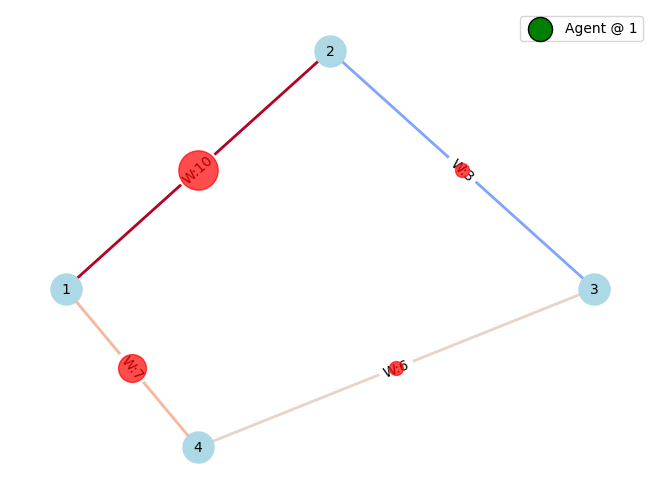

KeyboardInterrupt: 

In [21]:
#initialize map??
step_time = 1
for step in range(100):
    draw_graph_with_agent(graph, agents)

    for agent in agents:
        agent.step()
    
    graph.update_map()
    sleep(step_time)
    clear_output(wait=True)  # Clear previous output in the notebook